In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import cv2
from scipy import ndimage

In [4]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [2]:
all_npz = glob('data_with_centers/*.npz')
# print(all_npz)

alldata = []
for file in all_npz:
    with np.load(file) as data:
        alldata.append({'old_filename': data['old_filename'], 'biosensor': data['biosensor'], 'mask': data['mask'], 'cell_centers': data['cell_centers']})

alldata.sort(key=lambda x: x['old_filename'])

In [3]:
# Sorted by filename
for data in alldata:
    print(data['old_filename'] , data['biosensor'].shape, data['mask'].shape, len(data['cell_centers']))

fibronectin\20200722_Preo_Hela_fn\A4_seg.npz (717, 80, 80) (4159, 4159) 85
fibronectin\20200722_Preo_Hela_fn\B4_seg.npz (717, 80, 80) (4253, 4253) 405
fibronectin\20200722_Preo_Hela_fn\C4_seg.npz (717, 80, 80) (4179, 4179) 300
fibronectin\20200729_Preo_Hela_fn\B4_seg.npz (1189, 80, 80) (4204, 4204) 461
fibronectin\20200729_Preo_Hela_fn\C4_seg.npz (1189, 80, 80) (4235, 4235) 248
fibronectin\20210526_LCLC_fn\A1_seg.npz (1140, 80, 80) (4190, 4190) 55
fibronectin\20210526_LCLC_fn\A2_seg.npz (1140, 80, 80) (4169, 4169) 36
fibronectin\20210526_LCLC_fn\A3_seg.npz (1140, 80, 80) (4223, 4223) 51
fibronectin\20210526_LCLC_fn\A4_seg.npz (1140, 80, 80) (4234, 4234) 39
fibronectin\20210526_LCLC_fn\B1_seg.npz (1140, 80, 80) (4159, 4159) 50
fibronectin\20210526_LCLC_fn\B2_seg.npz (1140, 80, 80) (4210, 4210) 47
fibronectin\20210526_LCLC_fn\B3_seg.npz (1140, 80, 80) (4154, 4154) 47
fibronectin\20210526_LCLC_fn\B4_seg.npz (1140, 80, 80) (4201, 4201) 41
fibronectin\20210526_LCLC_fn\C1_seg.npz (1140, 80, 

In [ ]:
# Iterpolálás mellet az indexeket is le kell skálázni majd hozzáadni a megfeleő pixeleket a maszkhoz
def uniform_mask(mask_size, mask, centers):
        interpolated_mask = torch.nn.functional.interpolate(mask.unsqueeze(0).unsqueeze(0).float(), size=(mask_size, mask_size), mode='nearest').squeeze(0).squeeze(0).byte()
        x_scale = mask.shape[0] / mask_size
        y_scale = mask.shape[1] / mask_size
        # mask = mask.cuda().numpy()



(4159, 4159)
51.9875 51.9875


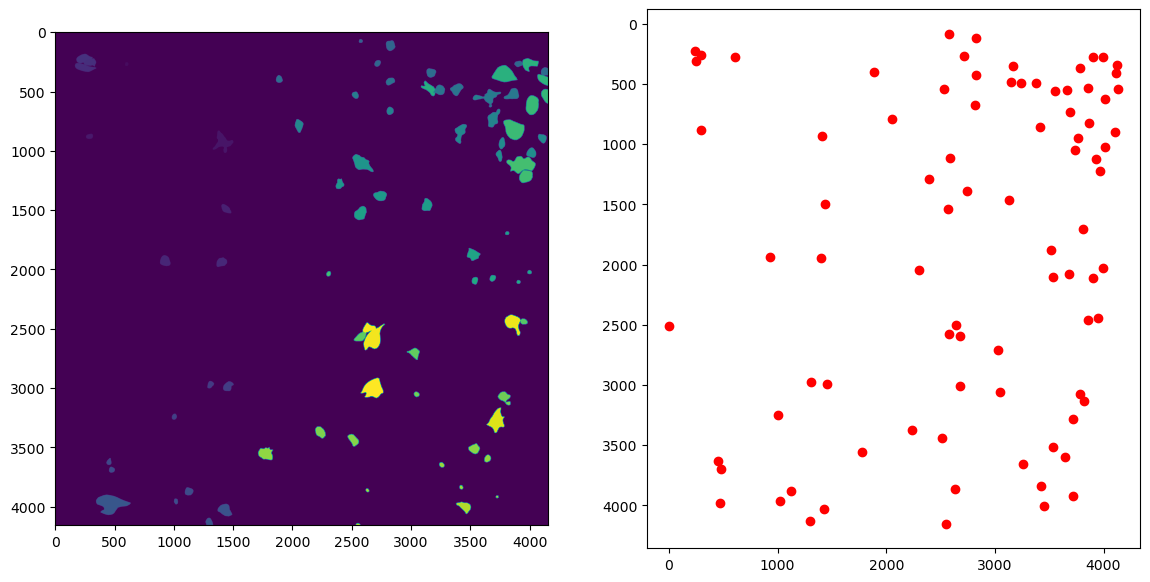

In [56]:
test = alldata[0]
test_mask = test['mask'].astype(np.uint8)
test_centers = test['cell_centers']
test_mask_tensor = torch.from_numpy(test_mask)

mask_size = 80

x, y = zip(*test_centers)
ig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].imshow(test_mask)

# Raw np calculation
axs[1].scatter(y, x, c='red')
axs[1].invert_yaxis()

print(test_mask.shape)
x_scale = mask.shape[0] / mask_size
y_scale = mask.shape[1] / mask_size
print(x_scale, y_scale)
scaled_centers = test_centers / [x_scale, y_scale]
# scaled_centers = scaled_centers.astype(int)
# print(scaled_centers)
interpolated_mask = torch.nn.functional.interpolate(test_mask_tensor.unsqueeze(0).unsqueeze(0).float(), size=(mask_size, mask_size), mode='nearest').squeeze(0).squeeze(0).byte()


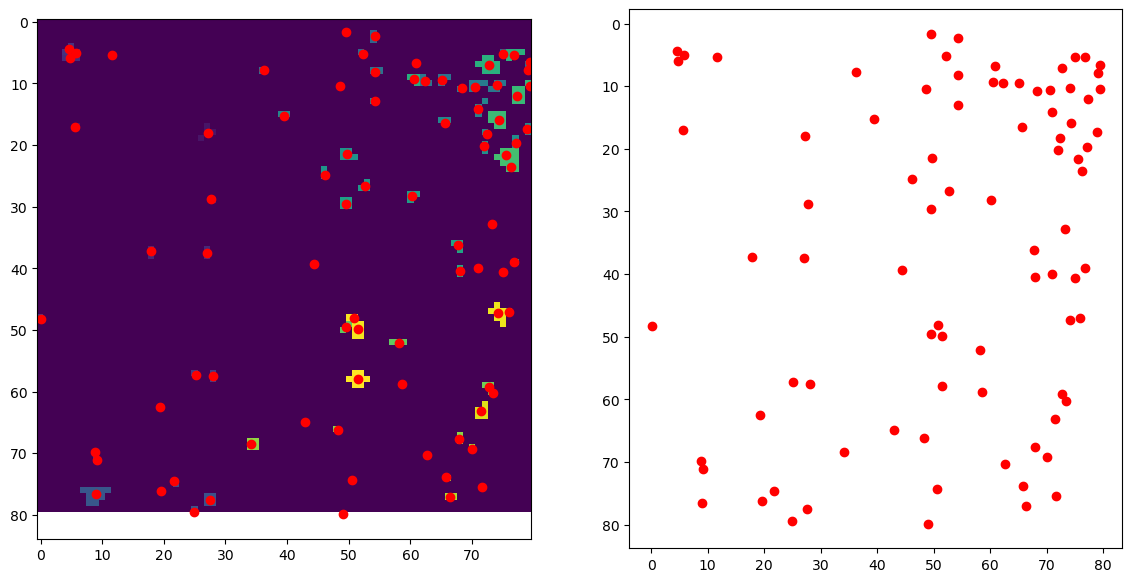

In [57]:
y = [point[0] for point in scaled_centers]
x = [point[1] for point in scaled_centers]

# create a 2D plot
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# plot the mask
axs[0].imshow(interpolated_mask)

# plot the centers on the mask
axs[0].scatter(x, y, c='red')

# Raw np calculation
axs[1].scatter(x, y, c='red')
axs[1].invert_yaxis()

# show the plot
plt.show()

In [58]:
# assuming interpolated_mask is your mask and it's a numpy array
# and scaled_centers are your centers

for point in scaled_centers:
    y, x = point
    # set the corresponding pixel in the mask to 255 (or any other value you want)
    interpolated_mask[int(y), int(x)] = 255

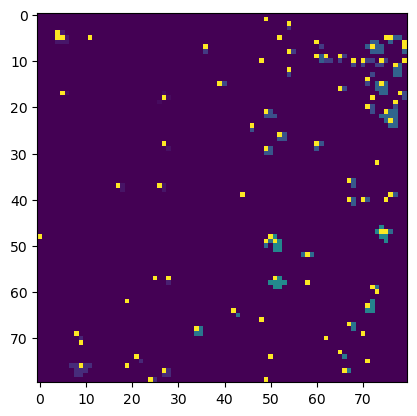

In [60]:
plt.imshow(interpolated_mask)

In [38]:
print(has_duplicate_arrays(scaled_centers))

False


In [37]:
def has_duplicate_arrays(arr_list):
    byte_arrays = [arr.tobytes() for arr in arr_list]
    return len(byte_arrays) != len(set(byte_arrays))

In [ ]:
plt.figure(figsize=(50, 50))
plt.imshow(test_mask)
plt.show()

[ 0  2  3  4  6  7  8  9 10 11 12 14 15 16 17 18 20 21 23 31 32 35 36 37
 38 39 40 45 46 48 49 50 51 54 56 57 60]


(37,)

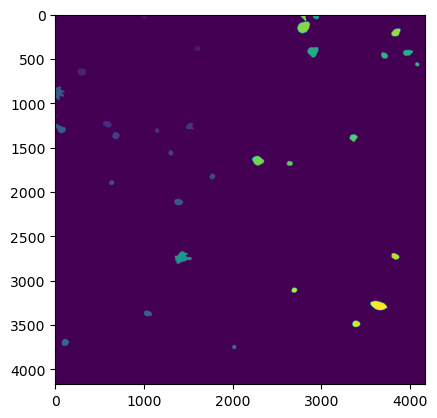

In [20]:
test_mask = masks[6]

# Nincs annyi sejt a maszkon ahány számmal jelöltük
plt.imshow(test_mask)
print(np.unique(test_mask))
np.unique(test_mask).shape

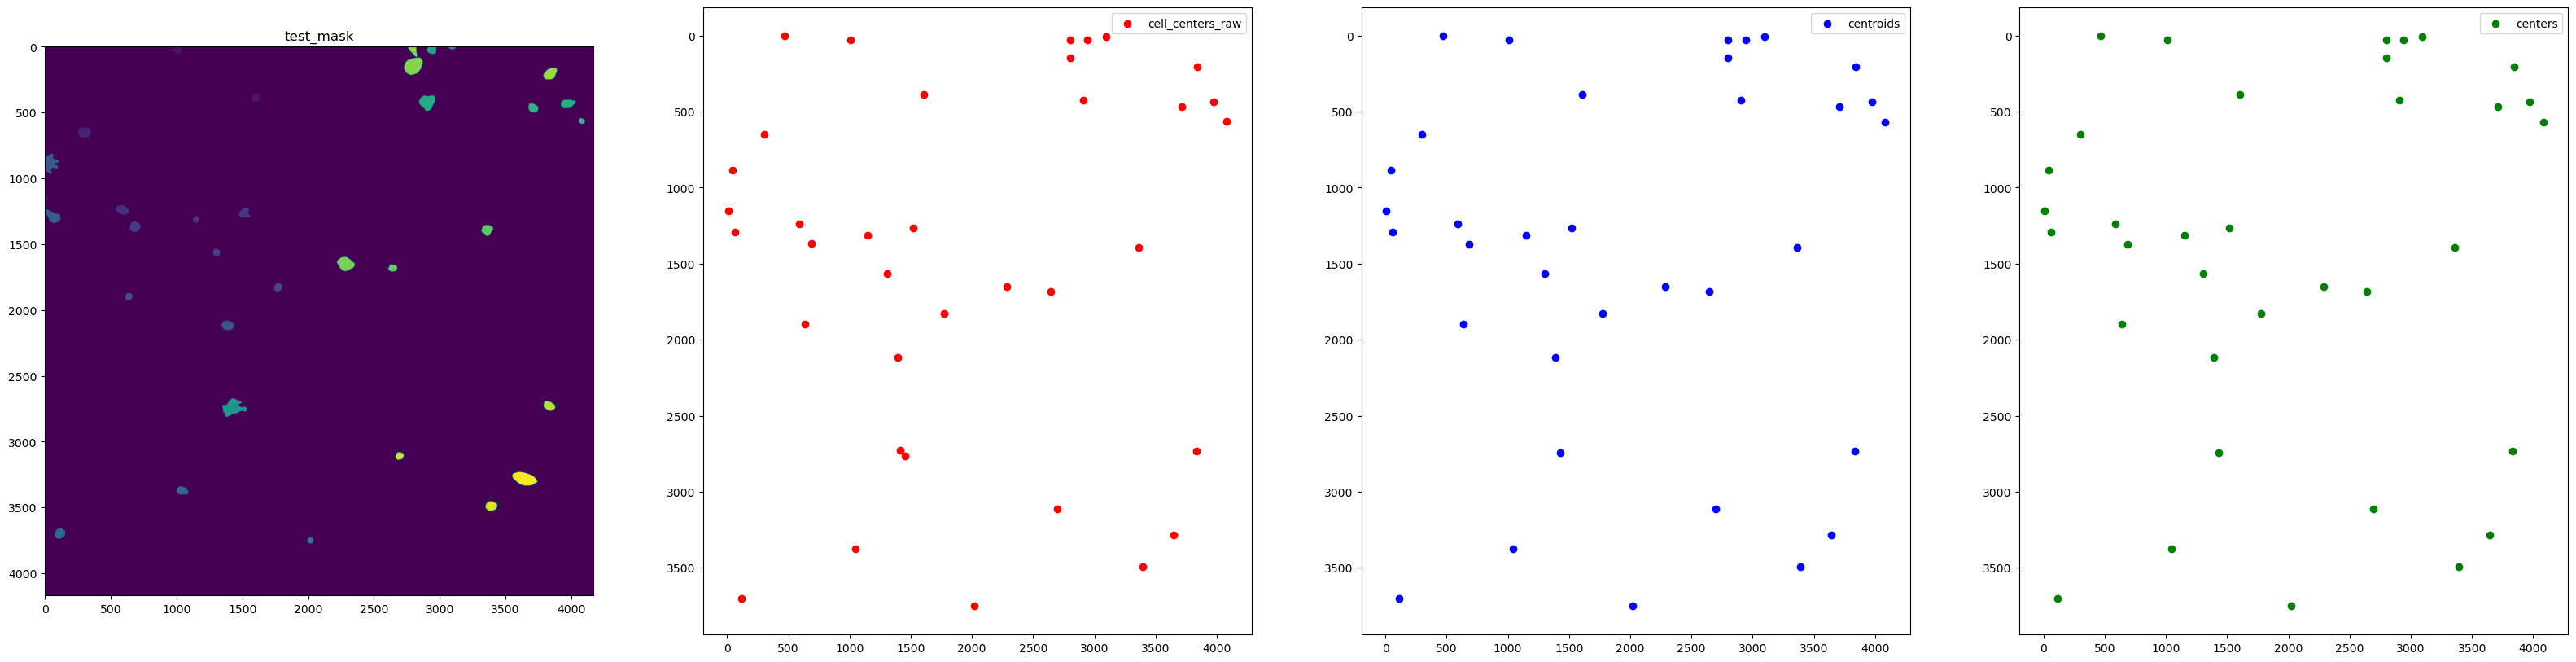

In [40]:
fig, axs = plt.subplots(1, 4, figsize=(40, 10))

# Plot the test_mask
axs[0].imshow(test_mask)
axs[0].set_title('test_mask')

# Create a scatter plot for cell_centers_raw
axs[1].scatter(cell_centers_raw_y, cell_centers_raw_x, c='red', label='cell_centers_raw')
axs[1].invert_yaxis()
axs[1].legend()

# Create a scatter plot for centroids
axs[2].scatter(centroids_x, centroids_y, c='blue', label='centroids')
axs[2].invert_yaxis()  # Invert the y-axis
axs[2].legend()

# Create a scatter plot for centers
axs[3].scatter(centers_y, centers_x, c='green', label='centers')
axs[3].invert_yaxis()
axs[3].legend()

plt.show()